<hr style="height:.9px;border:none;color:#333;background-color:#333;" />
<hr style="height:.9px;border:none;color:#333;background-color:#333;" />

<br><h1>Case Challenge Part I</h1>
<b>DAT-5303 | Machine Learning</b><br>
Arline Garin<br>
Hult International Business School<br><br><br>

<hr style="height:.9px;border:none;color:#333;background-color:#333;" />
<hr style="height:.9px;border:none;color:#333;background-color:#333;" />

<br>

Note: To ensure a code running time efficient and below 60 seconds, a majority of outputs have been transformed to comments inside code cells! 

In [1]:
# Importing libraries 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.formula.api as smf
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import sklearn.linear_model
from sklearn.neighbors import KNeighborsRegressor
from sklearn.preprocessing import StandardScaler

# setting pandas print options
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)


# specifying the path and file name
file = './Apprentice_Chef_Dataset.xlsx'


# reading the file into Python
chef = pd.read_excel(io = file)

In [2]:
# defining a function for categorical boxplots
def categorical_boxplots(response, cat_var, data):
    """
	This function is designed to generate a boxplot for  can be used for categorical variables.
    Make sure matplotlib.pyplot and seaborn have been imported (as plt and sns).

    PARAMETERS
	----------
	response : str, response variable
	cat_var  : str, categorical variable
	data     : DataFrame of the response and categorical variables
	"""

    fig, ax = plt.subplots(figsize = (10, 8))
    
    sns.boxplot(x    = response,
                y    = cat_var,
                data = data)
    
    plt.suptitle("")
    plt.show()
    
# defining a function for scatter plots
def scatterplot(x, y,  data, title = "", xlabel = "NA", ylabel = "NA"):
    """
	This function is designed to generate a scatterplot.
    Make sure matplotlib.pyplot and seaborn have been imported (as plt and sns).

    PARAMETERS
	----------
	x        : str, x-variable 
	y        : str, y-variable 
	data     : DataFrame of the variables
    title    : str, optional argument: title of the boxplot. Default: empty
	xlabel   : str, optional argument: label for x-axis. Default: x
	ylabel   : str, optional argument: label for y-axis. Default: y
	"""
    
     # Creating a label NA if not specified
    if xlabel == "NA":
        xlabel = x.title()
        
    if ylabel == "NA":
        ylabel = y.title()
    
    # Set figure size
    fig, ax = plt.subplots(figsize = (5, 5))
    
    # Create scatterplot
    sns.scatterplot(x     = data[x],
                    y     = data[y])
    
    # Format scatterplot
    plt.title(label   = title)
    plt.xlabel(xlabel = xlabel) 
    plt.ylabel(ylabel = ylabel)
    
    # Show boxplot
    plt.show()
    

# defining a function for displots
def displot(data, x, height, aspect, title = "", xlabel = "NA", ylabel = "NA"):
    """
	This function is designed to generate a scatterplot.
    Make sure matplotlib.pyplot and seaborn have been imported (as plt and sns).

    PARAMETERS
	----------
	data     : DataFrame of the variables
	x        : str, x-variable 
	height   : height of the plot
	aspect   : aspect of the plot
	title    : str, optional argument: title of the boxplot. Default: empty
	xlabel   : str, optional argument: label for x-axis. Default: x
	ylabel   : str, optional argument: label for y-axis. Default: y
	"""
    
     # Creating a label NA if not specified
    if xlabel == "NA":
        xlabel = x.title()
        
    if ylabel == "NA":
        ylabel = y.title()
    
    # Create displot
    sns.displot(data = data, 
                x     = data[x])
    
    # Format displot
    plt.title(label   = title)
    plt.xlabel(xlabel = xlabel) 
    plt.ylabel(ylabel = ylabel)
    
    # Show boxplot
    plt.show()
    
# defining a function for boxplots
def boxplot(x, y,  data, title = "", xlabel = "NA", ylabel = "NA"):
    """
	This function is designed to generate a scatterplot.
    Make sure matplotlib.pyplot and seaborn have been imported (as plt and sns).

    PARAMETERS
	----------
	x        : str, x-variable 
	y        : str, y-variable 
	data     : DataFrame of the variables
    title    : str, optional argument: title of the boxplot. Default: empty
	xlabel   : str, optional argument: label for x-axis. Default: x
	ylabel   : str, optional argument: label for y-axis. Default: y
	"""
    
     # Creating a label NA if not specified
    if xlabel == "NA":
        xlabel = x.title()
        
    if ylabel == "NA":
        ylabel = y.title()
    
    # Set figure size
    fig, ax = plt.subplots(figsize = (5, 5))
    
    # Create boxplot
    sns.boxplot(x     = data[x],
                y     = data[y])
    
    # Format boxplot
    plt.title(label   = title)
    plt.xlabel(xlabel = xlabel) 
    plt.ylabel(ylabel = ylabel)
    
    # Show boxplot
    plt.show()

## Exploratory Data Analysis - EDA

In [3]:
# formatting and printing the dimensions of the dataset
print(f"""
Size of Original Dataset
------------------------
Observations (= number of rows): {chef.shape[0]}
Features (= number of columns):     {chef.shape[1]}
""")


Size of Original Dataset
------------------------
Observations (= number of rows): 1946
Features (= number of columns):     28



In [4]:
# Renaming the mislabeled column 
chef.rename(columns = {'LARGEST_ORDER_SIZE':'AVG_NB_MEALS'}, inplace = True)

# descriptive statistics for numeric data
# chef.describe(include = 'number').round(2)

<u><b>CONTINUOUS</b></u><br>

- REVENUE (Y-variable) 
- TOTAL_MEALS_ORDERED
- AVG_TIME_PER_SITE_VISIT
- AVG_PREP_VID_TIME
- TOTAL_PHOTOS_VIEWED<br><br>  

<u><b>INTERVAL/COUNT</b></u><br>

- UNIQUE_MEALS_PURCH
- CONTACTS_W_CUSTOMER_SERVICE
- PRODUCT_CATEGORIES_VIEWED
- CANCELLATIONS_BEFORE_NOON
- CANCELLATIONS_AFTER_NOON
- MOBILE_LOGINS
- PC_LOGINS
- WEEKLY_PLAN
- EARLY_DELIVERIES
- LATE_DELIVERIES
- AVG_NB_MEALS
- MASTER_CLASSES_ATTENDED
- MEDIAN_MEAL_RATING
- AVG_CLICKS_PER_VISIT<br><br>

<u><b>CATEGORICAL</b></u><br>

- CROSS_SELL_SUCCESS
- MOBILE_NUMBER
- TASTES_AND_PREFERENCES
- PACKAGE_LOCKER
- REFRIGERATED_LOCKER

### Analyzing the distribution of the Y-variable

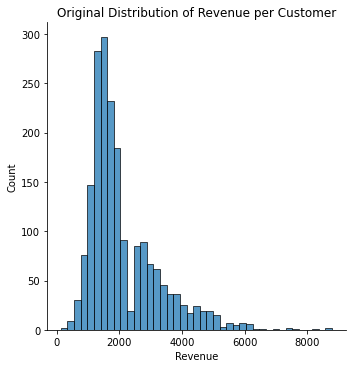

In [5]:
# developing a histogram using DISPLOT
displot(data = chef, x = 'REVENUE', height = 5, aspect = 2,
       title = "Original Distribution of Revenue per Customer", 
       xlabel = "Revenue",
       ylabel = "Count")

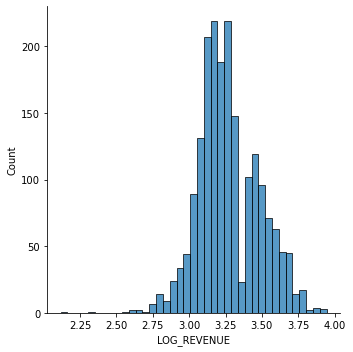

In [6]:
# REVENUE distribution is skewed positive
# log transforming REVENUE and saving it to the dataset
chef['LOG_REVENUE'] = np.log10(chef['REVENUE'])

sns.displot(chef['LOG_REVENUE'])

## Review of Missing Value Analysis and Imputation

In [7]:
# looping to detect features with missing values
for col in chef:

    # creating columns with 1s if missing and 0 if not
     if chef[col].isnull().astype(int).sum() > 0:
        chef['M_'+col] = chef[col].isnull().astype(int)


# summing the missing value flags to check the results of the loop above
chef[['M_FAMILY_NAME']].sum(axis = 0)

M_FAMILY_NAME    47
dtype: int64

In [8]:
# instantiating an imputation value
fill = 'NULL'

# imputing 'Mas Vnr Area'
chef['FAMILY_NAME'] = chef['FAMILY_NAME'].fillna(fill)

# making sure all missing values have been taken care of
chef.isnull().any().any()

False

## Continuous Data Variables

In [9]:
# creating a list of continuous features (including REVENUE)
continuous_data = ['LOG_REVENUE', 'TOTAL_MEALS_ORDERED', 'AVG_TIME_PER_SITE_VISIT', 'AVG_PREP_VID_TIME', 
                   'TOTAL_PHOTOS_VIEWED']


# developing a correlation matrix based on continuous features
chef_corr = chef[continuous_data].corr(method = 'pearson')


# filtering the results to only show correlations with Sale_Price
# chef_corr.loc[ : , 'LOG_REVENUE'].round(decimals = 2).sort_values(ascending = False)

## OUTPUT 

# REVENUE                    1.00
# AVG_PREP_VID_TIME          0.65
# TOTAL_MEALS_ORDERED        0.61
# TOTAL_PHOTOS_VIEWED        0.43
# AVG_TIME_PER_SITE_VISIT    0.14
# Name: REVENUE, dtype: float64

### Log Transformation

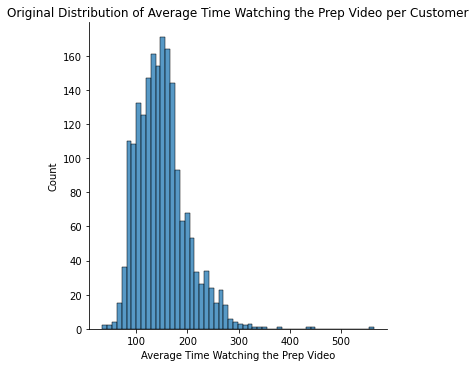

In [10]:
# developing a histogram using DISPLOT
displot(data = chef, x = 'AVG_PREP_VID_TIME', height = 5, aspect = 2,
       title = "Original Distribution of Average Time Watching the Prep Video per Customer", 
       xlabel = "Average Time Watching the Prep Video",
       ylabel = "Count")

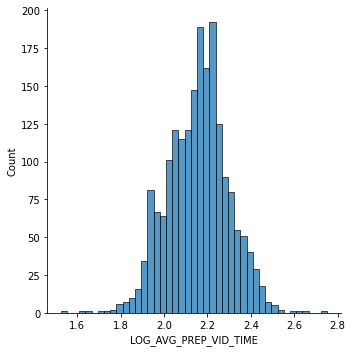

In [11]:
# Average Time Watching the Prep Video distribution is skewed positive
# log transforming AVG_PREP_VID_TIME and saving it to the dataset
chef['LOG_AVG_PREP_VID_TIME'] = np.log10(chef['AVG_PREP_VID_TIME'])
sns.displot(chef['LOG_AVG_PREP_VID_TIME'])

### Trend-Based Features

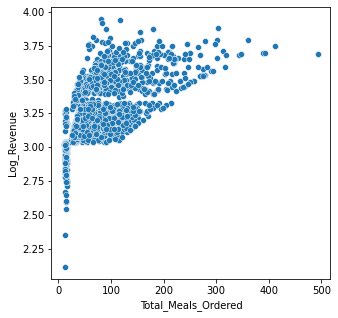

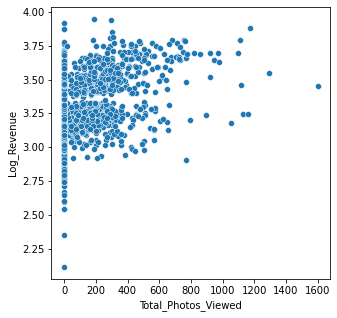

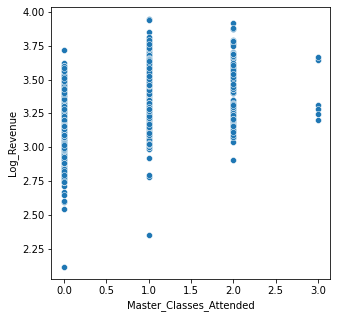

In [12]:
## Developing scatterplots to verify the distributions of continuous variables
scatterplot(x = 'TOTAL_MEALS_ORDERED', y = 'LOG_REVENUE', data = chef)
scatterplot(x = 'TOTAL_PHOTOS_VIEWED', y = 'LOG_REVENUE', data = chef)
scatterplot(x = 'MASTER_CLASSES_ATTENDED', y = 'LOG_REVENUE', data = chef)

In [13]:
# Differentiating low vs high numbers for continuous variables
HIGH_TOTAL_MEALS_ORDERED   = len(chef['TOTAL_MEALS_ORDERED'][chef['TOTAL_MEALS_ORDERED'] >= 30])
HAS_VIEWED_PHOTOS   = len(chef['TOTAL_PHOTOS_VIEWED'][chef['TOTAL_PHOTOS_VIEWED'] > 0])
LONG_WATCH_TIME = len(chef['AVG_PREP_VID_TIME'][chef['AVG_PREP_VID_TIME'] > 250])

# printing a table of the results
# print(f"""
#                             More than 30 meals \t Less than or equal to 30 meals
#                           ---------------------------------------------------------------
# Total Meals Ordered       |  {HIGH_TOTAL_MEALS_ORDERED} \t\t\t {len(chef) - HIGH_TOTAL_MEALS_ORDERED}
#
#                             Yes\tNo
#                           ---------------------
# Viewed Photos             | {HAS_VIEWED_PHOTOS}\t\t{len(chef) - HAS_VIEWED_PHOTOS}
# Long Watch Time           | {LONG_WATCH_TIME}\t\t{len(chef) - LONG_WATCH_TIME}
# """)

In [14]:
# dummy variables for high number of total meals, photos viewed positive 
chef['HIGH_TOTAL_MEALS_ORDERED']  = 0
chef['HAS_VIEWED_PHOTOS']         = 0
chef['LONG_WATCH_TIME']         = 0

# iterating over original columns to change values in the new feature columns
for index, value in chef.iterrows():
    
    # High Total Meals Ordered
    if chef.loc[index, 'TOTAL_MEALS_ORDERED'] > 30:
        chef.loc[index, 'HIGH_TOTAL_MEALS_ORDERED'] = 1
    
    # Positive Photos Viewed
    if chef.loc[index, 'TOTAL_PHOTOS_VIEWED'] > 0:
        chef.loc[index, 'HAS_VIEWED_PHOTOS'] = 1
        
    # Long watch time
    if chef.loc[index, 'AVG_PREP_VID_TIME'] > 250:
        chef.loc[index, 'LONG_WATCH_TIME'] = 1

## checking results
# chef[['HIGH_TOTAL_MEALS_ORDERED', 'HAS_VIEWED_PHOTOS', 'LONG_WATCH_TIME']] .head()

## OUTPUT

# 	HIGH_TOTAL_MEALS_ORDERED 	HAS_VIEWED_PHOTOS	LONG_WATCH_TIME
# 0	                      0 	                0   	          0
# 1	                      1 	                1   	          0
# 2	                      0 	                0   	          0
# 3	                      0 	                0   	          0
# 4	                      1 	                1   	          0

## Count Data Variables

In [15]:
# creating a list of interval features (including LOG_REVENUE)
interval_data = ['LOG_REVENUE', 'UNIQUE_MEALS_PURCH', 'CONTACTS_W_CUSTOMER_SERVICE', 
                 'PRODUCT_CATEGORIES_VIEWED','CANCELLATIONS_BEFORE_NOON', 
                 'CANCELLATIONS_AFTER_NOON', 'MOBILE_LOGINS', 'PC_LOGINS', 'WEEKLY_PLAN', 
                 'EARLY_DELIVERIES', 'LATE_DELIVERIES', 'AVG_NB_MEALS', 'MASTER_CLASSES_ATTENDED',
                 'MEDIAN_MEAL_RATING', 'AVG_CLICKS_PER_VISIT']

# developing a correlation matrix based on continuous features
chef_corr = chef[interval_data].corr(method = 'pearson')


# filtering the results to only show correlations with LOG_REVENUE
# chef_corr.loc[ : , 'LOG_REVENUE'].round(decimals = 2).sort_values(ascending = False)

## OUTPUT 

# LOG_REVENUE                    1.00
# MEDIAN_MEAL_RATING             0.65
# MASTER_CLASSES_ATTENDED        0.47
# AVG_NB_MEALS                   0.45
# PRODUCT_CATEGORIES_VIEWED      0.04
# WEEKLY_PLAN                    0.01
# PC_LOGINS                      0.01
# CANCELLATIONS_BEFORE_NOON      0.01
# EARLY_DELIVERIES              -0.01
# MOBILE_LOGINS                 -0.01
# LATE_DELIVERIES               -0.02
# CANCELLATIONS_AFTER_NOON      -0.04
# CONTACTS_W_CUSTOMER_SERVICE   -0.04
# UNIQUE_MEALS_PURCH            -0.08
# AVG_CLICKS_PER_VISIT          -0.58
# Name: LOG_REVENUE, dtype: float64

### Log Transformations

In [16]:
# Log Transforming Median Meal Rating & Average Clicks per Visit
chef['LOG_MEDIAN_MEAL_RATING'] = np.log10(chef['MEDIAN_MEAL_RATING'])
chef['LOG_AVG_CLICKS_PER_VISIT'] = np.log10(chef['AVG_CLICKS_PER_VISIT'])

# Building a correlation matrix
log_corr = chef.loc[ : , ['MEDIAN_MEAL_RATING',
                          'LOG_MEDIAN_MEAL_RATING',
                          'AVG_CLICKS_PER_VISIT',
                          'LOG_AVG_CLICKS_PER_VISIT',
                          'LOG_REVENUE']  ].corr(method = 'pearson')\
                                                 .round(decimals = 2)

# Check the results
# log_corr.loc[ ['MEDIAN_MEAL_RATING', 'LOG_MEDIAN_MEAL_RATING', 'AVG_CLICKS_PER_VISIT',
#               'LOG_AVG_CLICKS_PER_VISIT'], [ 'LOG_REVENUE'] ]

## OUTPUT

#                       	LOG_REVENUE
# MEDIAN_MEAL_RATING	           0.65
# LOG_MEDIAN_MEAL_RATING	       0.61
# AVG_CLICKS_PER_VISIT  	      -0.58
# LOG_AVG_CLICKS_PER_VISIT  	  -0.58

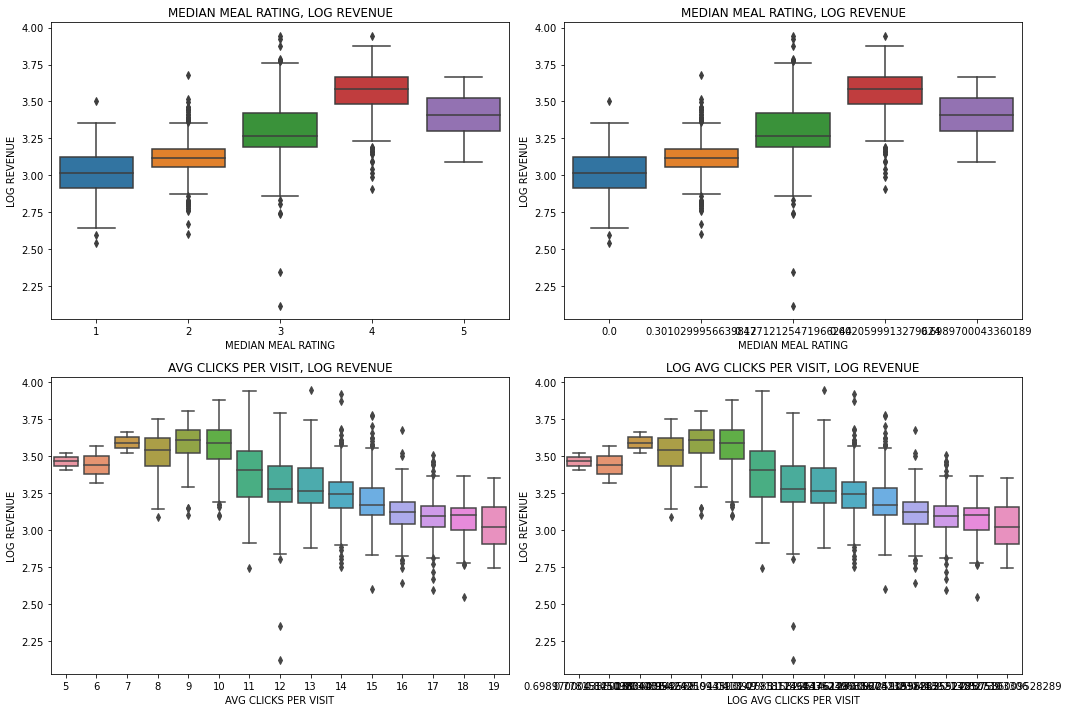

In [17]:
## comparing log transformation results ##

# setting figure size
fig, ax = plt.subplots(figsize = (15, 10))


## Plot 1: MEDIAN MEAL RATING, REVENUE ##
plt.subplot(2, 2, 1)

sns.boxplot(x = 'MEDIAN_MEAL_RATING', 
            y = 'LOG_REVENUE', 
            data = chef)
       

# titles and labels
plt.title(label = 'MEDIAN MEAL RATING, LOG REVENUE')
plt.xlabel(xlabel = 'MEDIAN MEAL RATING')
plt.ylabel(ylabel = 'LOG REVENUE')

## Plot 2: MEDIAN MEAL RATING, LOG REVENUE ##
plt.subplot(2, 2, 2)

sns.boxplot(x = 'LOG_MEDIAN_MEAL_RATING', 
            y = 'LOG_REVENUE',
            data = chef)


# titles and labels
plt.title(label   = 'MEDIAN MEAL RATING, LOG REVENUE')
plt.xlabel(xlabel = 'MEDIAN MEAL RATING')
plt.ylabel(ylabel = 'LOG REVENUE')


## Plot 3: AVG CLICKS PER VISIT, REVENUE ##
plt.subplot(2, 2, 3)
sns.boxplot(x     = 'AVG_CLICKS_PER_VISIT',
            y     = 'LOG_REVENUE',
            data  = chef)


# titles and labels
plt.title(label   = 'AVG CLICKS PER VISIT, LOG REVENUE')
plt.xlabel(xlabel = 'AVG CLICKS PER VISIT')
plt.ylabel(ylabel = 'LOG REVENUE')


## Plot 1: AVG CLICKS PER VISIT, LOG REVENUE ##
plt.subplot(2, 2, 4)
sns.boxplot(x     = 'LOG_AVG_CLICKS_PER_VISIT',
            y     = 'LOG_REVENUE',
           data  = chef)


# titles and labels
plt.title(label   = 'LOG AVG CLICKS PER VISIT, LOG REVENUE')
plt.xlabel(xlabel = 'LOG AVG CLICKS PER VISIT')
plt.ylabel(ylabel = 'LOG REVENUE')



## displaying the visuals ##
plt.tight_layout()
plt.show()

In [18]:
# New calculation for MEDIAN_MEAL_RATING
chef['SQUARED_MEDIAN_MEAL_RATING'] = chef['MEDIAN_MEAL_RATING'] ^ 2

### Trend-Based Features

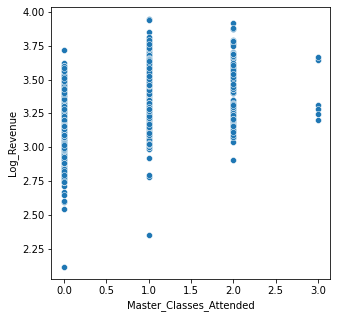

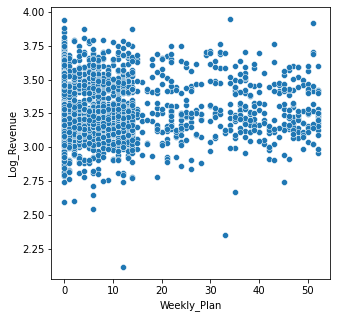

In [19]:
# developing scatterplots
scatterplot(x = 'MASTER_CLASSES_ATTENDED', y = 'LOG_REVENUE', data = chef)
scatterplot(x = 'WEEKLY_PLAN', y = 'LOG_REVENUE', data = chef)

In [20]:
# Differentiate positive numbers
HAS_ATTENDED_MASTER_CLASS = len(chef['MASTER_CLASSES_ATTENDED'][chef['MASTER_CLASSES_ATTENDED'] > 0])
HAS_ATTENDED_SEVERAL_CLASSES = len(chef['MASTER_CLASSES_ATTENDED'][chef['MASTER_CLASSES_ATTENDED'] > 1])
HAS_WEEKLY_PLAN = len(chef['WEEKLY_PLAN'][chef['WEEKLY_PLAN'] > 0])
HIGH_CONTACTS_W_CUSTOMER_SERVICE = len(chef['CONTACTS_W_CUSTOMER_SERVICE'][chef['CONTACTS_W_CUSTOMER_SERVICE'] > 8])

# Printing a table of the results
# print(f"""
#                                           Yes\t\tNo
#                                          ---------------------
# Attended Master Class                    | {HAS_ATTENDED_MASTER_CLASSES}\t\t{len(chef) - HAS_ATTENDED_MASTER_CLASSES}
# Attended Several Classes                 | {HAS_ATTENDED_SEVERAL_CLASSES}\t\t{len(chef) - HAS_ATTENDED_SEVERAL_CLASSES}
# Has a weekly plan                        | {HAS_WEEKLY_PLAN}\t\t{len(chef) - HAS_WEEKLY_PLAN}
# Has lots of contacts w customer service  | {HIGH_CONTACTS_W_CUSTOMER_SERVICE}\t\t{len(chef) - HIGH_CONTACTS_W_CUSTOMER_SERVICE}
# """)

# Dummy variables for customers who have attended master classes, and the ones who have a weekly plan
chef['HAS_ATTENDED_MASTER_CLASS']          = 0
chef['HAS_ATTENDED_SEVERAL_CLASSES']       = 0
chef['HAS_WEEKLY_PLAN']                    = 0
chef['HIGH_CONTACTS_W_CUSTOMER_SERVICE']   = 0

# Iterating over original columns to change values in the new feature columns
for index, value in chef.iterrows():
    
    # Has Attended Master Classes     
    if chef.loc[index, 'MASTER_CLASSES_ATTENDED'] > 0:
        chef.loc[index, 'HAS_ATTENDED_MASTER_CLASS'] = 1
        
    # Has Attended Several Master Classes     
    if chef.loc[index, 'MASTER_CLASSES_ATTENDED'] > 1:
        chef.loc[index, 'HAS_ATTENDED_SEVERAL_CLASSES'] = 1
    
    # Has a Weekly Plan
    if chef.loc[index, 'WEEKLY_PLAN'] > 0:
        chef.loc[index, 'HAS_WEEKLY_PLAN'] = 1
        
    # Lots of contact with customer service
    if chef.loc[index, 'CONTACTS_W_CUSTOMER_SERVICE'] > 8:
        chef.loc[index, 'HIGH_CONTACTS_W_CUSTOMER_SERVICE'] = 1

# Checking results
# chef[['HAS_ATTENDED_MASTER_CLASS', 'HAS_ATTENDED_SEVERAL_CLASSES', 'HAS_WEEKLY_PLAN', 
#     'HIGH_CONTACTS_W_CUSTOMER_SERVICE']].head()

## OUTPUT 

#   	HAS_ATTENDED_MASTER_CLASS	HAS_ATTENDED_SEVERAL_CLASSES	HAS_WEEKLY_PLAN	HIGH_CONTACTS_W_CUSTOMER_SERVICE
# 0 	                        0   	                      0 	              0 	                           1
# 1 	                        0   	                      0 	              1 	                           0
# 2 	                        0   	                      0 	              1 	                           1
# 3 	                        0   	                      0 	              1 	                           1
# 4 	                        1   	                      0 	              1 	                           0

## Categorical Data Variables

In [21]:
# counting the number of zeroes for Cross Sell Success, Mobile Number, Tastes & Preferences, Package Locker, Refrigerated Locker
cross_sell_zeroes = sum(chef['CROSS_SELL_SUCCESS'] == 0)
mobile_zeroes     = sum(chef['MOBILE_NUMBER'] == 0)
tastes_zeroes     = sum(chef['TASTES_AND_PREFERENCES'] == 0)
p_locker_zeroes   = sum(chef['PACKAGE_LOCKER'] == 0)
r_locker_zeroes   = sum(chef['REFRIGERATED_LOCKER'] == 0)


# printing a table of the results
# print(f"""
#                                 No\t\tYes
#                               ---------------------
# Cross-Sell Success           | {cross_sell_zeroes}\t\t{len(chef) - cross_sell_zeroes}
# Mobile Number                | {mobile_zeroes}\t\t{len(chef) - mobile_zeroes}
# Tastes & Preferences         | {tastes_zeroes}\t\t{len(chef) - tastes_zeroes}
# Package Locker               | {p_locker_zeroes}\t\t{len(chef) - p_locker_zeroes}
# Refrigerated Locker          | {r_locker_zeroes}\t\t{len(chef) - r_locker_zeroes}
# """)

# dummy variables
chef['HAS_CROSS_SOLD']           = 0
chef['HAS_MOBILE_NUMBER']        = 0
chef['HAS_MENTION_TASTES']       = 0
chef['HAS_PACKAGE_LOCKER']       = 0
chef['HAS_REFRIGERATED_LOCKER']  = 0


# iterating over each original column to change values in the new feature columns
for index, value in chef.iterrows():
    
    # Cross Sell Success
    if chef.loc[index, 'CROSS_SELL_SUCCESS'] > 0:
        chef.loc[index, 'HAS_CROSS_SOLD'] = 1


    # Mobile Number
    if chef.loc[index, 'MOBILE_NUMBER'] > 0:
        chef.loc[index, 'HAS_MOBILE_NUMBER'] = 1
        
        
    # Tastes & Preferences
    if chef.loc[index, 'TASTES_AND_PREFERENCES'] > 0:
        chef.loc[index, 'HAS_MENTION_TASTES'] = 1
        
        
    # Package Locker
    if chef.loc[index, 'PACKAGE_LOCKER'] > 0:
        chef.loc[index, 'HAS_PACKAGE_LOCKER'] = 1
       
    # Refrigerated Locker
    if chef.loc[index, 'REFRIGERATED_LOCKER'] > 0:
        chef.loc[index, 'HAS_REFRIGERATED_LOCKER'] = 1

# checking results
# chef[['HAS_CROSS_SOLD', 'HAS_MOBILE_NUMBER', 'HAS_MENTION_TASTES', 
#      'HAS_PACKAGE_LOCKER', 'HAS_REFRIGERATED_LOCKER']].head()

## OUTPUT

#   	HAS_CROSS_SOLD	HAS_MOBILE_NUMBER	HAS_MENTION_TASTES	HAS_PACKAGE_LOCKER	HAS_REFRIGERATED_LOCKER
# 0 	             1  	            1   	             1  	             0  	                  0
# 1 	             1  	            1   	             1  	             0  	                  0
# 2 	             1  	            1   	             1  	             0  	                  0
# 3 	             1  	            1   	             1  	             0  	                  0
# 4 	             1  	            1   	             0  	             0  	                  0

## Feature Engineering

### Gender Guesser

In [22]:
# import gender_guesser.detector as gender # guess gender based on (given) name

# guessing gender based on (given) name

# placeholder list
#placeholder_lst = []


# looping to guess gender
#for name in chef ['FIRST_NAME']:
    #guess = gender.Detector().get_gender(name)
    #print(guess)
    #placeholder_lst.append(guess)
    
# checking results
#print(placeholder_lst)

# Adding the guessed gender from gender_guesser.detector into a new column the dataframe 
chef['GENDER_GUESS'] = ['unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'female', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'male', 'unknown', 'female', 'male', 'unknown', 'male', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'male', 'unknown', 'male', 'unknown', 'unknown', 'unknown', 'unknown', 'female', 'unknown', 'unknown', 'unknown', 'unknown', 'male', 'male', 'unknown', 'male', 'unknown', 'male', 'unknown', 'unknown', 'unknown', 'male', 'male', 'unknown', 'unknown', 'male', 'male', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'male', 'male', 'unknown', 'unknown', 'mostly_male', 'female', 'unknown', 'male', 'male', 'unknown', 'male', 'unknown', 'unknown', 'unknown', 'male', 'unknown', 'unknown', 'male', 'unknown', 'unknown', 'unknown', 'unknown', 'mostly_male', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'male', 'male', 'male', 'unknown', 'male', 'unknown', 'unknown', 'male', 'male', 'male', 'female', 'unknown', 'unknown', 'male', 'unknown', 'unknown', 'unknown', 'female', 'unknown', 'male', 'unknown', 'male', 'unknown', 'female', 'male', 'unknown', 'unknown', 'male', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'female', 'male', 'female', 'female', 'unknown', 'male', 'unknown', 'male', 'unknown', 'male', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'male', 'unknown', 'unknown', 'unknown', 'male', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'male', 'female', 'unknown', 'andy', 'unknown', 'unknown', 'unknown', 'unknown', 'male', 'mostly_male', 'unknown', 'unknown', 'male', 'unknown', 'male', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'mostly_male', 'unknown', 'mostly_male', 'male', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'male', 'male', 'unknown', 'unknown', 'female', 'unknown', 'male', 'unknown', 'unknown', 'male', 'unknown', 'male', 'unknown', 'unknown', 'unknown', 'female', 'unknown', 'unknown', 'unknown', 'unknown', 'male', 'male', 'unknown', 'unknown', 'unknown', 'unknown', 'male', 'unknown', 'male', 'unknown', 'female', 'unknown', 'unknown', 'unknown', 'male', 'unknown', 'mostly_male', 'unknown', 'unknown', 'male', 'unknown', 'unknown', 'unknown', 'unknown', 'male', 'unknown', 'unknown', 'unknown', 'male', 'unknown', 'unknown', 'female', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'male', 'unknown', 'female', 'unknown', 'unknown', 'male', 'unknown', 'unknown', 'unknown', 'male', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'male', 'unknown', 'unknown', 'unknown', 'unknown', 'male', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'female', 'unknown', 'male', 'unknown', 'male', 'unknown', 'male', 'male', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'male', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'male', 'male', 'unknown', 'male', 'unknown', 'unknown', 'unknown', 'unknown', 'male', 'female', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'male', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'male', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'male', 'male', 'unknown', 'unknown', 'mostly_male', 'male', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'male', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'male', 'unknown', 'unknown', 'unknown', 'unknown', 'male', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'mostly_female', 'unknown', 'unknown', 'andy', 'unknown', 'unknown', 'female', 'male', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'mostly_male', 'unknown', 'unknown', 'male', 'unknown', 'unknown', 'unknown', 'male', 'unknown', 'unknown', 'unknown', 'male', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'female', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'mostly_female', 'unknown', 'male', 'male', 'unknown', 'unknown', 'male', 'unknown', 'unknown', 'unknown', 'andy', 'male', 'unknown', 'unknown', 'male', 'male', 'female', 'female', 'unknown', 'unknown', 'male', 'unknown', 'male', 'unknown', 'unknown', 'male', 'male', 'unknown', 'unknown', 'unknown', 'unknown', 'female', 'unknown', 'unknown', 'unknown', 'male', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'mostly_female', 'female', 'unknown', 'male', 'female', 'unknown', 'unknown', 'unknown', 'female', 'male', 'unknown', 'female', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'male', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'male', 'male', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'female', 'female', 'unknown', 'male', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'female', 'male', 'unknown', 'unknown', 'male', 'male', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'female', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'female', 'unknown', 'unknown', 'unknown', 'unknown', 'female', 'unknown', 'unknown', 'unknown', 'unknown', 'mostly_female', 'unknown', 'unknown', 'unknown', 'unknown', 'mostly_female', 'mostly_female', 'male', 'unknown', 'unknown', 'unknown', 'male', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'female', 'female', 'female', 'male', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'male', 'unknown', 'male', 'female', 'unknown', 'unknown', 'unknown', 'male', 'unknown', 'unknown', 'unknown', 'unknown', 'male', 'unknown', 'unknown', 'unknown', 'male', 'unknown', 'unknown', 'unknown', 'female', 'male', 'male', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'male', 'unknown', 'unknown', 'male', 'unknown', 'male', 'male', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'male', 'unknown', 'unknown', 'male', 'male', 'male', 'male', 'male', 'male', 'male', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'male', 'female', 'unknown', 'unknown', 'female', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'mostly_female', 'mostly_female', 'unknown', 'male', 'unknown', 'female', 'unknown', 'female', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'male', 'unknown', 'male', 'female', 'unknown', 'unknown', 'unknown', 'female', 'unknown', 'unknown', 'unknown', 'male', 'male', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'male', 'unknown', 'unknown', 'male', 'male', 'unknown', 'female', 'male', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'female', 'unknown', 'unknown', 'male', 'male', 'male', 'male', 'unknown', 'unknown', 'male', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'male', 'unknown', 'male', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'male', 'male', 'female', 'male', 'male', 'male', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'male', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'male', 'male', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'female', 'unknown', 'male', 'unknown', 'unknown', 'male', 'unknown', 'female', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'male', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'male', 'unknown', 'male', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'male', 'unknown', 'unknown', 'unknown', 'male', 'unknown', 'male', 'male', 'male', 'mostly_male', 'male', 'male', 'male', 'male', 'mostly_male', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'female', 'male', 'unknown', 'unknown', 'unknown', 'male', 'unknown', 'unknown', 'unknown', 'male', 'male', 'unknown', 'unknown', 'unknown', 'male', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'male', 'unknown', 'unknown', 'unknown', 'male', 'male', 'unknown', 'male', 'unknown', 'unknown', 'andy', 'unknown', 'male', 'unknown', 'unknown', 'unknown', 'male', 'unknown', 'male', 'unknown', 'unknown', 'unknown', 'male', 'unknown', 'unknown', 'unknown', 'mostly_male', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'male', 'female', 'unknown', 'male', 'unknown', 'male', 'unknown', 'unknown', 'unknown', 'male', 'male', 'mostly_male', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'male', 'male', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'male', 'male', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'male', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'female', 'male', 'unknown', 'unknown', 'unknown', 'unknown', 'female', 'unknown', 'male', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'male', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'female', 'female', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'female', 'unknown', 'male', 'male', 'male', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'female', 'unknown', 'unknown', 'unknown', 'unknown', 'male', 'unknown', 'male', 'unknown', 'male', 'unknown', 'male', 'female', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'male', 'unknown', 'female', 'female', 'male', 'male', 'female', 'female', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'mostly_male', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'female', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'mostly_male', 'unknown', 'unknown', 'unknown', 'female', 'unknown', 'unknown', 'unknown', 'unknown', 'male', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'female', 'unknown', 'male', 'andy', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'male', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'male', 'unknown', 'female', 'unknown', 'male', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'male', 'unknown', 'female', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'female', 'unknown', 'unknown', 'male', 'unknown', 'male', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'male', 'male', 'male', 'male', 'unknown', 'female', 'unknown', 'unknown', 'male', 'male', 'unknown', 'unknown', 'unknown', 'andy', 'unknown', 'female', 'male', 'unknown', 'unknown', 'unknown', 'male', 'unknown', 'unknown', 'unknown', 'male', 'male', 'male', 'unknown', 'unknown', 'unknown', 'unknown', 'male', 'unknown', 'unknown', 'unknown', 'male', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'female', 'female', 'unknown', 'unknown', 'male', 'unknown', 'male', 'unknown', 'unknown', 'unknown', 'mostly_male', 'male', 'male', 'male', 'unknown', 'male', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'male', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'male', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'male', 'unknown', 'unknown', 'unknown', 'male', 'male', 'male', 'male', 'unknown', 'unknown', 'unknown', 'female', 'unknown', 'unknown', 'male', 'unknown', 'male', 'unknown', 'unknown', 'unknown', 'mostly_male', 'male', 'unknown', 'male', 'unknown', 'unknown', 'female', 'unknown', 'male', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'female', 'male', 'male', 'unknown', 'male', 'male', 'male', 'male', 'unknown', 'unknown', 'unknown', 'female', 'male', 'male', 'unknown', 'male', 'unknown', 'mostly_female', 'male', 'unknown', 'unknown', 'female', 'male', 'unknown', 'male', 'unknown', 'male', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'male', 'male', 'unknown', 'unknown', 'unknown', 'unknown', 'female', 'male', 'unknown', 'unknown', 'unknown', 'female', 'male', 'male', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'mostly_female', 'unknown', 'unknown', 'unknown', 'unknown', 'male', 'male', 'male', 'male', 'female', 'unknown', 'unknown', 'male', 'male', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'male', 'unknown', 'male', 'male', 'unknown', 'unknown', 'unknown', 'unknown', 'male', 'unknown', 'unknown', 'female', 'unknown', 'unknown', 'male', 'male', 'unknown', 'unknown', 'unknown', 'male', 'unknown', 'male', 'unknown', 'unknown', 'unknown', 'female', 'unknown', 'mostly_male', 'mostly_male', 'male', 'unknown', 'unknown', 'unknown', 'unknown', 'male', 'unknown', 'male', 'unknown', 'female', 'male', 'male', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'male', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'male', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'female', 'male', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'male', 'male', 'unknown', 'unknown', 'male', 'male', 'male', 'mostly_male', 'unknown', 'unknown', 'male', 'andy', 'unknown', 'unknown', 'unknown', 'male', 'unknown', 'unknown', 'unknown', 'male', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'male', 'unknown', 'unknown', 'male', 'unknown', 'unknown', 'unknown', 'male', 'unknown', 'unknown', 'unknown', 'male', 'unknown', 'unknown', 'unknown', 'mostly_female', 'unknown', 'male', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'male', 'unknown', 'unknown', 'unknown', 'male', 'male', 'unknown', 'unknown', 'male', 'female', 'unknown', 'unknown', 'female', 'unknown', 'unknown', 'unknown', 'female', 'unknown', 'unknown', 'mostly_female', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'female', 'unknown', 'female', 'male', 'female', 'mostly_female', 'unknown', 'unknown', 'male', 'unknown', 'unknown', 'male', 'unknown', 'male', 'male', 'unknown', 'unknown', 'male', 'male', 'unknown', 'unknown', 'unknown', 'unknown', 'male', 'mostly_female', 'unknown', 'unknown', 'unknown', 'male', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'male', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'female', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'female', 'unknown', 'unknown', 'female', 'unknown', 'unknown', 'unknown', 'female', 'female', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'female', 'unknown', 'unknown', 'unknown', 'male', 'unknown', 'unknown', 'unknown', 'unknown', 'male', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'male', 'unknown', 'female', 'female', 'female', 'unknown', 'unknown', 'unknown', 'male', 'unknown', 'unknown', 'unknown', 'unknown', 'mostly_female', 'male', 'unknown', 'unknown', 'female', 'unknown', 'unknown', 'unknown', 'unknown', 'male', 'mostly_female', 'unknown', 'unknown', 'female', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'female', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'female', 'mostly_female', 'female', 'female', 'male', 'male', 'male', 'unknown', 'unknown', 'mostly_female', 'unknown', 'unknown', 'male', 'male', 'unknown', 'male', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'male', 'male', 'unknown', 'female', 'unknown', 'male', 'unknown', 'unknown', 'male', 'unknown', 'male', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'male', 'male', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'male', 'female', 'unknown', 'unknown', 'unknown', 'unknown', 'male', 'male', 'female', 'unknown', 'male', 'unknown', 'unknown', 'male', 'male', 'unknown', 'unknown', 'male', 'unknown', 'andy', 'unknown', 'unknown', 'male', 'male', 'male', 'unknown', 'male', 'unknown', 'unknown', 'unknown', 'male', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'male', 'unknown', 'female', 'unknown', 'unknown', 'unknown', 'mostly_male', 'male', 'male', 'unknown', 'male', 'unknown', 'mostly_male', 'female', 'unknown', 'male', 'unknown', 'unknown', 'unknown', 'unknown', 'male', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'male', 'male', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'male', 'unknown', 'unknown', 'unknown', 'female', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'female', 'unknown', 'unknown', 'unknown', 'male', 'male', 'unknown', 'unknown', 'unknown', 'male', 'unknown', 'unknown', 'male', 'unknown', 'unknown', 'unknown', 'unknown', 'mostly_male', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'female', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'female', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'male', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'male', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'mostly_female', 'unknown', 'unknown', 'unknown', 'female', 'female', 'unknown', 'unknown', 'unknown', 'mostly_male', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'male', 'male', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'female', 'unknown', 'unknown', 'male', 'unknown', 'unknown', 'unknown', 'unknown', 'mostly_female', 'unknown', 'unknown', 'female', 'unknown', 'unknown', 'unknown', 'unknown', 'male', 'unknown', 'unknown', 'unknown', 'male', 'unknown', 'unknown', 'male', 'male', 'unknown', 'female', 'unknown', 'unknown', 'male', 'male', 'male', 'male', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'mostly_female', 'male', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'andy', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'male', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'female', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'female', 'unknown', 'unknown', 'unknown', 'male', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'male', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'male', 'unknown', 'unknown', 'unknown', 'male', 'mostly_male', 'unknown', 'male', 'male', 'unknown', 'unknown', 'male', 'male', 'male', 'male', 'andy', 'unknown', 'unknown', 'female', 'unknown', 'unknown', 'male', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'male', 'female', 'female', 'unknown', 'unknown', 'male', 'unknown', 'unknown', 'unknown', 'unknown', 'male', 'male', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'male', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'male', 'unknown', 'unknown', 'female', 'unknown', 'unknown']

# Checking results
# chef['GENDER_GUESS'].value_counts()

## OUTPUT
# unknown          1385
# male              381
# female            125
# mostly_male        24
# mostly_female      21
# andy               10
# Name: GENDER_GUESS, dtype: int64

# Reducing the number of "unknown" gender 

for index, row in chef.iterrows():

    # First nested condition for Gender guessed as "unknown"
    if 'unknown' in chef.loc[index, 'GENDER_GUESS']:

        if chef.loc[index, 'FIRST_NAME'].endswith('a'):
            chef.loc[index, 'GENDER_GUESS'] = 'female'
            
        elif chef.loc[index, 'FIRST_NAME'].endswith('o'):
            chef.loc[index, 'GENDER_GUESS'] = 'male'
            
        elif chef.loc[index, 'FIRST_NAME'].endswith('r'):
            chef.loc[index, 'GENDER_GUESS'] = 'male'
            
        elif chef.loc[index, 'FIRST_NAME'].endswith('d'):
            chef.loc[index, 'GENDER_GUESS'] = 'male'
            
        elif chef.loc[index, 'FIRST_NAME'].endswith('lin'):
            chef.loc[index, 'GENDER_GUESS'] = 'female'

        elif chef.loc[index, 'FIRST_NAME'].endswith('lyn'):
            chef.loc[index, 'GENDER_GUESS'] = 'female'
            
        elif chef.loc[index, 'FIRST_NAME'].endswith('on'):
            chef.loc[index, 'GENDER_GUESS'] = 'male'
            
        elif chef.loc[index, 'FIRST_NAME'].endswith('os'):
            chef.loc[index, 'GENDER_GUESS'] = 'male'
            
        elif chef.loc[index, 'FIRST_NAME'].endswith('ne'):
            chef.loc[index, 'GENDER_GUESS'] = 'female'
            
        elif chef.loc[index, 'FIRST_NAME'].endswith('en'):
            chef.loc[index, 'GENDER_GUESS'] = 'male'
            
        elif chef.loc[index, 'FIRST_NAME'].endswith('s'):
            chef.loc[index, 'GENDER_GUESS'] = 'male'
            
        elif chef.loc[index, 'FIRST_NAME'].endswith('se'):
            chef.loc[index, 'GENDER_GUESS'] = 'female'
            
        elif chef.loc[index, 'FIRST_NAME'].endswith('k'):
            chef.loc[index, 'GENDER_GUESS'] = 'male'
            
        elif chef.loc[index, 'FIRST_NAME'].endswith('e'):
            chef.loc[index, 'GENDER_GUESS'] = 'female'
            
        elif chef.loc[index, 'FIRST_NAME'].endswith('y'):
            chef.loc[index, 'GENDER_GUESS'] = 'female'
    
    # Second condition for Gender guessed as "mostly_male"
    elif 'mostly_male' in chef.loc[index, 'GENDER_GUESS']:
        chef.loc[index, 'GENDER_GUESS'] = 'male'
    
    # Third condition for Gender guessed as "mostly_female"
    elif 'mostly_female' in chef.loc[index, 'GENDER_GUESS']:
        chef.loc[index, 'GENDER_GUESS'] = 'female'
    
    # Fourth condition for Gender guessed as "andy"
    elif 'andy' in chef.loc[index, 'GENDER_GUESS']:
        chef.loc[index, 'GENDER_GUESS'] = 'male'
        
# Checking results
# chef['GENDER_GUESS'].value_counts()


## OUTPUT
# male       1082
# female      516
# unknown     348
# Name: GENDER_GUESS, dtype: int64

# categorical_boxplots(response = 'LOG_REVENUE', cat_var = 'GENDER_GUESS', data = chef)

# one hot encoding GENDER categorical variable
GENDER_DUMMIES       = pd.get_dummies(chef['GENDER_GUESS'])

# dropping categorical variables after they've been encoded
chef = chef.drop('GENDER_GUESS', axis = 1)

# joining codings together
chef = chef.join([GENDER_DUMMIES])

# saving new columns
new_columns = chef.columns

### Email Addresses

In [23]:
# Divide the emails by domain knowledge provided by Customer Service Team
professional = ["mmm.com", "amex.com", "apple.com", "boeing.com", "caterpillar.com",
    "chevron.com", "cisco.com", "cocacola.com", "disney.com", "dupont.com",
    "exxon.com", "ge.org", "goldmansacs.com", "homedepot.com", "ibm.com",
    "intel.com", "jnj.com", "jpmorgan.com", "mcdonalds.com", "merck.com",
    "microsoft.com", "nike.com", "pfizer.com", "pg.com", "travelers.com",
    "unitedtech.com", "unitedhealth.com", "verizon.com", "visa.com",
    "walmart.com"]

personal = ["gmail.com", "yahoo.com", "protonmail.com"]

junk = ["me.com", "aol.com", "hotmail.com", "live.com", "msn.com", "passport.com"]

# Split by @ and select domains
chef['EMAIL_DOMAIN'] = chef.EMAIL.str.split('@', expand=True)[1]

# Create email_type column
chef['EMAIL_TYPE'] = '0'

# Populate the Email Type column by if else statements
for index, row in chef.iterrows():

    if chef.loc[index, 'EMAIL_DOMAIN'] in professional:
        chef.loc[index, 'EMAIL_TYPE'] = 'professional'
    elif chef.loc[index, 'EMAIL_DOMAIN'] in personal:
        chef.loc[index, 'EMAIL_TYPE'] = 'personal'
    elif chef.loc[index, 'EMAIL_DOMAIN'] in junk:
        chef.loc[index, 'EMAIL_TYPE'] = 'junk'
    elif chef.loc[index, 'EMAIL_DOMAIN'] not in professional or chef.loc[row, 'EMAIL'] not in personal or chef.loc[row, 'EMAIL'] not in junk:
        chef.loc[index, 'EMAIL_TYPE'] = 'unknown'
    else:
        print('Houston, we have a problem')

# Checking results
chef['EMAIL_TYPE'].value_counts()

## OUTPUT

# personal        861
# professional    696
# junk            389
# Name: EMAIL_TYPE, dtype: int64

# Distribution of Email Type
# categorical_boxplots(response = 'LOG_REVENUE', cat_var = 'EMAIL_TYPE', data = chef)

# one hot encoding categorical variable
EMAIL_TYPE_DUMMIES       = pd.get_dummies(chef['EMAIL_TYPE'])

# dropping categorical variables after they've been encoded
chef = chef.drop('EMAIL_TYPE', axis = 1)

# joining codings together
chef = chef.join([EMAIL_TYPE_DUMMIES])

# saving new columns
new_columns = chef.columns

### Cancellations & Customer Service

In [24]:
# New variable combining all cancellations
chef['CANCELLATIONS'] = chef['CANCELLATIONS_BEFORE_NOON'] + chef['CANCELLATIONS_AFTER_NOON']

# Creating dummy variable to know if a customer has ever cancelled an order
chef['HAS_CANCELLED']  = 0

# iterating over each original column to change values in the new feature columns
for index, value in chef.iterrows():
    
    # Cancellations
    if chef.loc[index, 'CANCELLATIONS'] > 0:
        chef.loc[index, 'HAS_CANCELLED'] = 1


# Creating dummy variable to know if a customer has ever cancelled an order after noon        
chef['HAS_CANCELLED_AF']  = 0

# iterating over each original column to change values in the new feature columns
for index, value in chef.iterrows():
    
    # Cancellations after noon
    if chef.loc[index, 'CANCELLATIONS_AFTER_NOON'] > 0:
        chef.loc[index, 'HAS_CANCELLED_AF'] = 1

# Creating dummy variable to know if a customer has ever cancelled an order before noon        
chef['HAS_CANCELLED_BF']  = 0

# iterating over each original column to change values in the new feature columns
for index, value in chef.iterrows():
    
    # Cancellations after noon
    if chef.loc[index, 'CANCELLATIONS_BEFORE_NOON'] > 0:
        chef.loc[index, 'HAS_CANCELLED_BF'] = 1

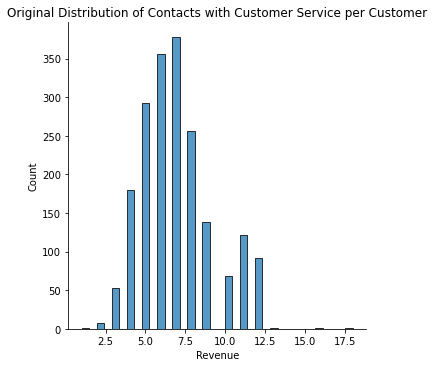

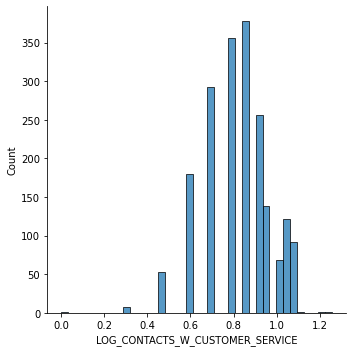

In [25]:
# Plotting original distribution of contacts with customer service
displot(data = chef, x = 'CONTACTS_W_CUSTOMER_SERVICE', height = 5, aspect = 2,
       title = "Original Distribution of Contacts with Customer Service per Customer", 
       xlabel = "Revenue",
       ylabel = "Count")

# Distribution is skewed positive
# Log transformation of number of contacts with customer service
chef['LOG_CONTACTS_W_CUSTOMER_SERVICE'] = np.log10(chef['CONTACTS_W_CUSTOMER_SERVICE'])
sns.displot(chef['LOG_CONTACTS_W_CUSTOMER_SERVICE'])

### Orders

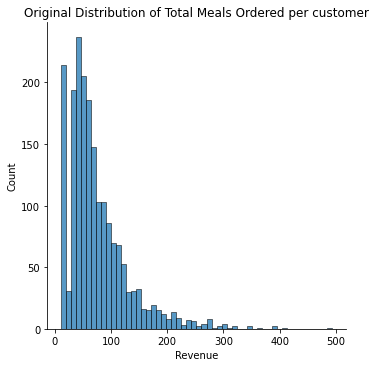

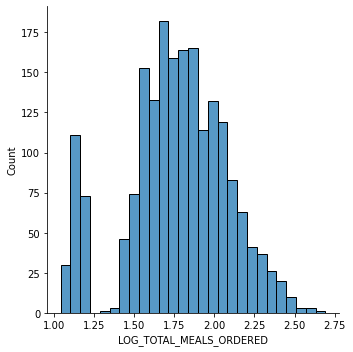

In [26]:
# Plotting original distribution of total meals ordered
displot(data = chef, x = 'TOTAL_MEALS_ORDERED', height = 5, aspect = 2,
       title = "Original Distribution of Total Meals Ordered per customer", 
       xlabel = "Revenue",
       ylabel = "Count")

# Distribution is skewed positive
# Log transformation of number of contacts with customer service
chef['LOG_TOTAL_MEALS_ORDERED'] = np.log10(chef['TOTAL_MEALS_ORDERED'])
sns.displot(chef['LOG_TOTAL_MEALS_ORDERED'])

In [27]:
# New variable to sum up Total Orders 
chef['TOTAL_ORDERS'] = chef['TOTAL_MEALS_ORDERED'] / chef['AVG_NB_MEALS']

## Visualizing distribution of total orders 
# displot(data = chef, x = 'TOTAL_ORDERS', height = 5, aspect = 2,
#       title = "Original Distribution of Total Orders", 
#       xlabel = "Total Orders",
#       ylabel = "Count")

## Total Orders distribution is skewed positive
# log transforming TOTAL_ORDERS and saving it to the dataset
chef['LOG_TOTAL_ORDERS'] = np.log10(chef['TOTAL_ORDERS'])

# sns.displot(chef['LOG_TOTAL_ORDERS'])

# log transforming AVG_NB_MEALS & UNIQUE_MEALS_PURCH and saving them to the dataset
chef['LOG_AVG_NB_MEALS'] = np.log10(chef['AVG_NB_MEALS'])
chef['LOG_UNIQUE_MEALS_PURCH'] = np.log10(chef['UNIQUE_MEALS_PURCH'])

# New variable to calculate the number of unique orders
chef['UNIQUE_ORDERS'] = chef['UNIQUE_MEALS_PURCH'] / chef['TOTAL_MEALS_ORDERED']
# Log Transformation
chef['LOG_UNIQUE_ORDERS'] = np.log10(chef['UNIQUE_ORDERS'])

# New variable to calculate the actual orders
chef['ACTUAL_ORDERS'] = chef['TOTAL_MEALS_ORDERED'] - chef['CANCELLATIONS']
# Log Transformation
chef['LOG_ACTUAL_ORDERS'] = np.log10(chef['ACTUAL_ORDERS'])

In [28]:
# developing a correlation matrix
order_corr = chef.loc[ : , ['LOG_TOTAL_ORDERS',
                              'LOG_REVENUE']  ].corr(method = 'pearson')\
                                              .round(decimals = 2)

# printing correlation
# order_corr['LOG_REVENUE']

## OUTPUT 

# LOG_TOTAL_ORDERS    0.5
# LOG_REVENUE         1.0
# Name: LOG_REVENUE, dtype: float64

### Online Behavior

In [29]:
# Log transformation of average time spent per visit on the website
chef['LOG_AVG_TIME_PER_SITE_VISIT'] = np.log10(chef['AVG_TIME_PER_SITE_VISIT'])

# New variable to sum up total number of logins 
chef['TOTAL_LOGINS'] = chef['PC_LOGINS'] + chef['MOBILE_LOGINS']

# New variable to sum up total photos viewed per login
chef['PHOTOS_VIEWED_PER_LOGIN'] = chef['TOTAL_PHOTOS_VIEWED'] / chef['TOTAL_LOGINS']

# New variable to sum up total time spent on the website
chef['TIME_SPENT_ON_WEBSITE'] = (chef['PC_LOGINS'] + chef['MOBILE_LOGINS']) * chef['AVG_TIME_PER_SITE_VISIT']
# Log transformation of total time spent on the website
chef['LOG_TIME_SPENT_ON_WEBSITE'] = np.log10(chef['TIME_SPENT_ON_WEBSITE'])

In [ ]:
# saving results
titanic.to_excel('./datasets/titanic_feature_rich.xlsx',
                 index = False)

## Train testing

In [30]:
# creating a (Pearson) correlation matrix
df_corr = chef.corr().round(2)


# printing (Pearson) correlations with SalePrice
# print(df_corr.loc['LOG_REVENUE'].sort_values(ascending = False))

In [31]:
# making a copy of housing
chef_explanatory = chef.copy()


# dropping SalePrice and Order from the explanatory variable set
chef_explanatory = chef_explanatory.drop(['NAME', 'EMAIL', 'FIRST_NAME', 'FAMILY_NAME', 'EMAIL_DOMAIN',
                                         'M_FAMILY_NAME', 'REVENUE', 'LOG_REVENUE', 'TOTAL_MEALS_ORDERED',
                                         'LOG_UNIQUE_MEALS_PURCH', 'CONTACTS_W_CUSTOMER_SERVICE', 
                                         'AVG_TIME_PER_SITE_VISIT','AVG_PREP_VID_TIME', 'LOG_AVG_NB_MEALS', 
                                         'LOG_MEDIAN_MEAL_RATING','LOG_AVG_CLICKS_PER_VISIT', 'TOTAL_ORDERS', 
                                         'TIME_SPENT_ON_WEBSITE', 'ACTUAL_ORDERS','UNIQUE_ORDERS'], axis = 1)


# formatting each explanatory variable for statsmodels
# for val in chef_explanatory:
#    print(f"{val} +")

In [32]:
lm_full = smf.ols(formula = """LOG_REVENUE ~ CROSS_SELL_SUCCESS +
                            UNIQUE_MEALS_PURCH +
                            PRODUCT_CATEGORIES_VIEWED +
                            MOBILE_NUMBER +
                            CANCELLATIONS_BEFORE_NOON +
                            CANCELLATIONS_AFTER_NOON +
                            TASTES_AND_PREFERENCES +
                            PC_LOGINS +
                            MOBILE_LOGINS +
                            WEEKLY_PLAN +
                            EARLY_DELIVERIES +
                            LATE_DELIVERIES +
                            PACKAGE_LOCKER +
                            REFRIGERATED_LOCKER +
                            AVG_NB_MEALS +
                            MASTER_CLASSES_ATTENDED +
                            MEDIAN_MEAL_RATING +
                            AVG_CLICKS_PER_VISIT +
                            TOTAL_PHOTOS_VIEWED +
                            LOG_AVG_PREP_VID_TIME +
                            HIGH_TOTAL_MEALS_ORDERED +
                            HAS_VIEWED_PHOTOS +
                            LONG_WATCH_TIME +
                            SQUARED_MEDIAN_MEAL_RATING +
                            HAS_ATTENDED_MASTER_CLASS +
                            HAS_ATTENDED_SEVERAL_CLASSES +
                            HAS_WEEKLY_PLAN +
                            HIGH_CONTACTS_W_CUSTOMER_SERVICE +
                            HAS_CROSS_SOLD +
                            HAS_MOBILE_NUMBER +
                            HAS_MENTION_TASTES +
                            HAS_PACKAGE_LOCKER +
                            HAS_REFRIGERATED_LOCKER +
                            female +
                            male +
                            unknown +
                            junk +
                            personal +
                            professional +
                            CANCELLATIONS +
                            HAS_CANCELLED +
                            HAS_CANCELLED_AF +
                            HAS_CANCELLED_BF +
                            LOG_CONTACTS_W_CUSTOMER_SERVICE +
                            LOG_TOTAL_MEALS_ORDERED +
                            LOG_TOTAL_ORDERS +
                            LOG_UNIQUE_ORDERS +
                            LOG_ACTUAL_ORDERS +
                            LOG_AVG_TIME_PER_SITE_VISIT +
                            TOTAL_LOGINS +
                            PHOTOS_VIEWED_PER_LOGIN +
                            LOG_TIME_SPENT_ON_WEBSITE""",
                               data = chef)


# telling Python to run the data through the blueprint
results_full = lm_full.fit()


# printing the results
results_full.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            LOG_REVENUE   R-squared:                       0.784
Model:                            OLS   Adj. R-squared:                  0.779
Method:                 Least Squares   F-statistic:                     160.5
Date:                Tue, 09 Feb 2021   Prob (F-statistic):               0.00
Time:                        19:41:18   Log-Likelihood:                 1750.7
No. Observations:                1946   AIC:                            -3413.
Df Residuals:                    1902   BIC:                            -3168.
Df Model:                          43                                         
Covariance Type:            nonrobust                                         
====================================================================================================
                                       coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------------
Intercept                            0.8002      0.164      4.875      0.000       0.478       1.122
CROSS_SELL_SUCCESS                  -0.0075      0.003     -2.839      0.005      -0.013      -0.002
UNIQUE_MEALS_PURCH                   0.0492      0.003     17.370      0.000       0.044       0.055
PRODUCT_CATEGORIES_VIEWED            0.0011      0.001      1.513      0.130      -0.000       0.003
MOBILE_NUMBER                        0.0039      0.004      1.098      0.273      -0.003       0.011
CANCELLATIONS_BEFORE_NOON           -0.0013      0.005     -0.236      0.813      -0.012       0.009
CANCELLATIONS_AFTER_NOON             0.0077      0.010      0.749      0.454      -0.012       0.028
TASTES_AND_PREFERENCES               0.0046      0.003      1.805      0.071      -0.000       0.010
PC_LOGINS                           -0.0123      0.014     -0.872      0.383      -0.040       0.015
MOBILE_LOGINS                       -0.0141      0.014     -1.018      0.309      -0.041       0.013
WEEKLY_PLAN                          0.0001      0.000      0.665      0.506      -0.000       0.001
EARLY_DELIVERIES                    -0.0012      0.001     -1.223      0.221      -0.003       0.001
LATE_DELIVERIES                     -0.0004      0.001     -0.536      0.592      -0.002       0.001
PACKAGE_LOCKER                      -0.0032      0.003     -1.188      0.235      -0.009       0.002
REFRIGERATED_LOCKER                 -0.0040      0.004     -0.975      0.330      -0.012       0.004
AVG_NB_MEALS                        -0.0207      0.006     -3.446      0.001      -0.032      -0.009
MASTER_CLASSES_ATTENDED             -0.0704      0.042     -1.672      0.095      -0.153       0.012
MEDIAN_MEAL_RATING                   0.0415      0.006      6.459      0.000       0.029       0.054
AVG_CLICKS_PER_VISIT                 0.0011      0.002      0.569      0.569      -0.003       0.005
TOTAL_PHOTOS_VIEWED                  0.0002      0.000      1.788      0.074   -1.93e-05       0.000
LOG_AVG_PREP_VID_TIME                0.5508      0.034     15.967      0.000       0.483       0.618
HIGH_TOTAL_MEALS_ORDERED             0.0869      0.011      7.573      0.000       0.064       0.109
HAS_VIEWED_PHOTOS                    0.0195      0.007      2.918      0.004       0.006       0.033
LONG_WATCH_TIME                      0.0243      0.014      1.754      0.080      -0.003       0.052
SQUARED_MEDIAN_MEAL_RATING           0.0136      0.002      7.888      0.000       0.010       0.017
HAS_ATTENDED_MASTER_CLASS            0.1022      0.042      2.411      0.016       0.019       0.185
HAS_ATTENDED_SEVERAL_CLASSES         0.0913      0.044      2.054      0.040       0.004       0.178
HAS_WEEKLY_PLAN                     -0.0137      0.00

In [33]:
lm_fit = smf.ols(formula = """LOG_REVENUE ~ LOG_TOTAL_MEALS_ORDERED +
                                LOG_ACTUAL_ORDERS +
                                LOG_AVG_PREP_VID_TIME +
                                MEDIAN_MEAL_RATING +
                                HIGH_TOTAL_MEALS_ORDERED +
                                SQUARED_MEDIAN_MEAL_RATING +
                                AVG_NB_MEALS +
                                PHOTOS_VIEWED_PER_LOGIN +
                                LOG_UNIQUE_ORDERS +
                                CROSS_SELL_SUCCESS +
                                UNIQUE_MEALS_PURCH +
                                LOG_CONTACTS_W_CUSTOMER_SERVICE +
                                MASTER_CLASSES_ATTENDED
                                """,
                               data = chef)


# telling Python to run the data through the blueprint
results_fit = lm_fit.fit()


# printing the results
results_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            LOG_REVENUE   R-squared:                       0.777
Model:                            OLS   Adj. R-squared:                  0.776
Method:                 Least Squares   F-statistic:                     517.8
Date:                Tue, 09 Feb 2021   Prob (F-statistic):               0.00
Time:                        19:41:18   Log-Likelihood:                 1719.7
No. Observations:                1946   AIC:                            -3411.
Df Residuals:                    1932   BIC:                            -3333.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
===================================================================================================
                                      coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------
Intercept                           1.5521      0.060     26.079      0.000       1.435       1.669
LOG_TOTAL_MEALS_ORDERED            -0.6414      0.092     -6.956      0.000      -0.822      -0.461
LOG_ACTUAL_ORDERS                   0.2536      0.085      2.977      0.003       0.087       0.421
LOG_AVG_PREP_VID_TIME               0.5571      0.033     16.740      0.000       0.492       0.622
MEDIAN_MEAL_RATING                  0.0416      0.005      9.171      0.000       0.033       0.051
HIGH_TOTAL_MEALS_ORDERED            0.0850      0.011      7.755      0.000       0.063       0.106
SQUARED_MEDIAN_MEAL_RATING          0.0145      0.002      8.814      0.000       0.011       0.018
AVG_NB_MEALS                       -0.0169      0.003     -6.647      0.000      -0.022      -0.012
PHOTOS_VIEWED_PER_LOGIN             0.0006   9.94e-05      5.659      0.000       0.000       0.001
LOG_UNIQUE_ORDERS                  -0.5862      0.025    -23.042      0.000      -0.636      -0.536
CROSS_SELL_SUCCESS                 -0.0099      0.005     -2.005      0.045      -0.020      -0.000
UNIQUE_MEALS_PURCH                  0.0484      0.003     17.528      0.000       0.043       0.054
LOG_CONTACTS_W_CUSTOMER_SERVICE     0.1714      0.019      8.926      0.000       0.134       0.209
MASTER_CLASSES_ATTENDED             0.0280      0.004      6.744      0.000       0.020       0.036
==============================================================================
Omnibus:                      337.694   Durbin-Watson:                   2.030
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1850.867
Skew:                          -0.701   Prob(JB):                         0.00
Kurtosis:                       7.568   Cond. No.                     1.69e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.69e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [34]:
# declaring set of x-variables
x_variables = ['LOG_TOTAL_MEALS_ORDERED',
                'LOG_ACTUAL_ORDERS',
                'LOG_AVG_PREP_VID_TIME',
                'MEDIAN_MEAL_RATING',
                'HIGH_TOTAL_MEALS_ORDERED',
                'SQUARED_MEDIAN_MEAL_RATING',
                'AVG_NB_MEALS',
                'PHOTOS_VIEWED_PER_LOGIN',
                'LOG_UNIQUE_ORDERS',
                'CROSS_SELL_SUCCESS',
                'UNIQUE_MEALS_PURCH',
                'LOG_CONTACTS_W_CUSTOMER_SERVICE',
                'MASTER_CLASSES_ATTENDED']

In [35]:
# preparing explanatory variable data
chef_data   = chef.drop(['NAME', 'EMAIL', 'FIRST_NAME', 'FAMILY_NAME', 'EMAIL_DOMAIN',
                                         'M_FAMILY_NAME', 'REVENUE', 'LOG_REVENUE', 'TOTAL_MEALS_ORDERED',
                                         'LOG_UNIQUE_MEALS_PURCH', 'CONTACTS_W_CUSTOMER_SERVICE', 
                                         'AVG_TIME_PER_SITE_VISIT','AVG_PREP_VID_TIME', 'LOG_AVG_NB_MEALS', 
                                         'LOG_MEDIAN_MEAL_RATING','LOG_AVG_CLICKS_PER_VISIT', 'TOTAL_ORDERS', 
                                         'TIME_SPENT_ON_WEBSITE', 'ACTUAL_ORDERS','UNIQUE_ORDERS'], axis = 1)

# preparing x-variables from the OLS model
ols_data = chef.loc[:, x_variables]

# preparing response variables
chef_target = chef.loc[ : , 'REVENUE']
log_chef_target = chef.loc[ : , 'LOG_REVENUE']


# preparing training and testing sets (all letters are lowercase)
x_train, x_test, y_train, y_test = train_test_split(
            chef_data,
            chef_target,
            test_size = 0.25,
            random_state = 219)


# checking the shapes of the datasets
print(f"""
Training Data
-------------
X-side: {x_train.shape}
y-side: {y_train.shape}


Testing Data
------------
X-side: {x_test.shape}
y-side: {y_test.shape}
""")


Training Data
-------------
X-side: (1459, 52)
y-side: (1459,)


Testing Data
------------
X-side: (487, 52)
y-side: (487,)



In [36]:
###############################################
## setting up more than one train-test split ##
###############################################
# FULL X-dataset (normal Y) - Lasso
x_train_FULL_LA, x_test_FULL_LA, y_train_FULL_LA, y_test_FULL_LA = train_test_split(
            chef_data,     # x-variables
            chef_target,   # y-variable
            test_size = 0.25,
            random_state = 219)

# FULL X-dataset (normal Y) - ARD
x_train_FULL, x_test_FULL, y_train_FULL, y_test_FULL = train_test_split(
            chef_data,     # x-variables
            log_chef_target,   # y-variable
            test_size = 0.25,
            random_state = 219)


# OLS p-value x-dataset (Log Y)
x_train_OLS, x_test_OLS, y_train_OLS, y_test_OLS = train_test_split(
            ols_data,         # x-variables
            log_chef_target,   # y-variable
            test_size = 0.25,
            random_state = 219)

### Ordinary Least Squares Regression Model

In [37]:
# INSTANTIATING a model object
lr = sklearn.linear_model.LinearRegression()


# FITTING to the training data
lr_fit = lr.fit(x_train_OLS, y_train_OLS)


# PREDICTING on new data
lr_pred = lr_fit.predict(x_test_OLS)


# SCORING the results
#cprint('OLS Training Score :', lr.score(x_train_OLS, y_train_OLS).round(4))  # using R-square
# print('OLS Testing Score  :',  lr.score(x_test_OLS, y_test_OLS).round(4)) # using R-square

lr_train_score = lr.score(x_train_OLS, y_train_OLS).round(4)
lr_test_score = lr.score(x_test_OLS, y_test_OLS).round(4)


# displaying and saving the gap between training and testing
# print('OLS Train-Test Gap :', abs(lr_train_score - lr_test_score).round(4))
lr_test_gap = abs(lr_train_score - lr_test_score).round(4)

In [38]:
# zipping each feature name to its coefficient
lr_model_values = zip(chef_data[x_variables].columns,
                      lr_fit.coef_.round(decimals = 2))


# setting up a placeholder list to store model features
lr_model_lst = [('intercept', lr_fit.intercept_.round(decimals = 2))]


# printing out each feature-coefficient pair one by one
for val in lr_model_values:
    lr_model_lst.append(val)
    

# checking the results
# for pair in lr_model_lst:
#    print(pair)

### Lasso Regression Model

In [39]:
# INSTANTIATING a model object
lasso_model = sklearn.linear_model.Lasso(alpha = 1.0,
                                         normalize = True) # default magitude


# FITTING to the training data
lasso_fit = lasso_model.fit(x_train_FULL_LA, y_train_FULL_LA)


# PREDICTING on new data
lasso_pred = lasso_fit.predict(x_test_FULL_LA)


# SCORING the results
# print('Lasso Training Score :', lasso_model.score(x_train_FULL_LA, y_train_FULL_LA).round(4))
# print('Lasso Testing Score  :', lasso_model.score(x_test_FULL_LA, y_test_FULL_LA).round(4))


## the following code has been provided for you ##

# saving scoring data for future use
lasso_train_score = lasso_model.score(x_train_FULL_LA, y_train_FULL_LA).round(4) # using R-square
lasso_test_score  = lasso_model.score(x_test_FULL_LA, y_test_FULL_LA).round(4)   # using R-square


# displaying and saving the gap between training and testing
# print('Lasso Train-Test Gap :', abs(lr_train_score - lr_test_score).round(4))
lasso_test_gap = abs(lr_train_score - lr_test_score).round(4)

In [40]:
# zipping each feature name to its coefficient
lasso_model_values = zip(chef_data.columns, lasso_fit.coef_.round(decimals = 2))


# setting up a placeholder list to store model features
lasso_model_lst = [('intercept', lasso_fit.intercept_.round(decimals = 2))]


# printing out each feature-coefficient pair one by one
for val in lasso_model_values:
    lasso_model_lst.append(val)
    

# checking the results
# for pair in lasso_model_lst:
#    print(pair)

In [41]:
## This code may have to be run more than once ##

# dropping coefficients that are equal to zero

# printing out each feature-coefficient pair one by one
for feature, coefficient in lasso_model_lst:
        
        if coefficient == 0:
            lasso_model_lst.remove((feature, coefficient))

# checking the results
# for pair in lasso_model_lst:
#    print(pair)

### Bayesian Automatic Relevance Determination Model

In [42]:
# INSTANTIATING a model object
ard_model = sklearn.linear_model.ARDRegression(normalize = False)


# FITTING the training data
ard_fit = ard_model.fit(x_train_FULL, y_train_FULL)


# PREDICTING on new data
ard_pred = ard_fit.predict(x_test_FULL)


# print('Training Score:', ard_model.score(x_train_FULL, y_train_FULL).round(4))
# print('Testing Score :',  ard_model.score(x_test_FULL, y_test_FULL).round(4))


# saving scoring data for future use
ard_train_score = ard_model.score(x_train_FULL, y_train_FULL).round(4)
ard_test_score  = ard_model.score(x_test_FULL, y_test_FULL).round(4)


# displaying and saving the gap between training and testing
# print('ARD Train-Test Gap :', abs(ard_train_score - ard_test_score).round(4))
ard_test_gap = abs(ard_train_score - ard_test_score).round(4)

In [43]:
# zipping each feature name to its coefficient
ard_model_values = zip(chef_data.columns, ard_fit.coef_.round(decimals = 5))


# setting up a placeholder list to store model features
ard_model_lst = [('intercept', ard_fit.intercept_.round(decimals = 2))]


# printing out each feature-coefficient pair one by one
for val in ard_model_values:
    ard_model_lst.append(val)
    

# checking the results
# for pair in ard_model_lst:
#    print(pair)

In [44]:
## This code may have to be run more than once ##

# dropping coefficients that are equal to zero

# printing out each feature-coefficient pair one by one
for feature, coefficient in ard_model_lst:
        
        if coefficient == 0:
            ard_model_lst.remove((feature, coefficient))

            
# checking the results
# for pair in ard_model_lst:
#    print(pair)

### K-Nearest Neighbors Regression with Standardized Data

In [45]:
# INSTANTIATING a StandardScaler() object
scaler = StandardScaler()


# FITTING the scaler with housing_data
scaler.fit(chef_data)


# TRANSFORMING our data after fit
X_scaled = scaler.transform(chef_data)


# converting scaled data into a DataFrame
X_scaled_df = pd.DataFrame(X_scaled)

# KNN Standardized Data dataset
X_train_STAND, X_test_STAND, y_train_STAND, y_test_STAND = train_test_split(
            X_scaled_df,
            chef_target,
            test_size = 0.25,
            random_state = 219)

In [46]:
# creating lists for training set accuracy and test set accuracy
training_accuracy = []
test_accuracy     = []


# building a visualization of 1 to 50 neighbors
neighbors_settings = range(1, 51)


for n_neighbors in neighbors_settings:
    # Building the model
    clf = KNeighborsRegressor(n_neighbors = n_neighbors)
    clf.fit(X_train_STAND, y_train_STAND)
    
    # Recording the training set accuracy
    training_accuracy.append(clf.score(X_train_STAND, y_train_STAND))
    
    # Recording the generalization accuracy
    test_accuracy.append(clf.score(X_test_STAND, y_test_STAND))


# finding the optimal number of neighbors
opt_neighbors = test_accuracy.index(max(test_accuracy)) + 1
print(f"""The optimal number of neighbors is {opt_neighbors}""")

The optimal number of neighbors is 6


In [47]:
# INSTANTIATING a KNN model object
knn_reg = KNeighborsRegressor(algorithm = 'auto',
                              n_neighbors = 6)


# FITTING to the training data
knn_fit = knn_reg.fit(X_train_STAND, y_train_STAND)


# PREDICTING on new data
knn_reg_pred = knn_fit.predict(X_test_STAND)


# SCORING the results
print('KNN Training Score:', knn_reg.score(X_train_STAND, y_train_STAND).round(4))
print('KNN Testing Score :',  knn_reg.score(X_test_STAND, y_test_STAND).round(4))


# saving scoring data for future use
knn_reg_score_train = knn_reg.score(X_train_STAND, y_train_STAND).round(4)
knn_reg_score_test  = knn_reg.score(X_test_STAND, y_test_STAND).round(4)


# displaying and saving the gap between training and testing
print('KNN Train-Test Gap:', abs(knn_reg_score_train - knn_reg_score_test).round(4))
knn_reg_test_gap = abs(knn_reg_score_train - knn_reg_score_test).round(4)

KNN Training Score: 0.709
KNN Testing Score : 0.6403
KNN Train-Test Gap: 0.0687


## Final Model Output

In [48]:
# creating a dictionary for model results
model_performance = {
    
    'Model Type'    : ['OLS (final)', 'Lasso', 'ARD', 'KNN Std'],
           
    'Training' : [lr_train_score, lasso_train_score,
                                   ard_train_score, knn_reg_score_train],
           
    'Testing'  : [lr_test_score, lasso_test_score,
                                   ard_test_score, knn_reg_score_test],
                    
    'Train-Test Gap' : [lr_test_gap, lasso_test_gap,
                                        ard_test_gap, knn_reg_test_gap],
                    
    'Model Size' : [len(lr_model_lst), len(lasso_model_lst),
                                    len(ard_model_lst), 'NA'],
                    
    'Model' : [lr_model_lst, lasso_model_lst, ard_model_lst, 'NA']}


# converting model_performance into a DataFrame
model_performance = pd.DataFrame(model_performance)

# sending model results to Excel
model_performance.to_excel('./linear_model_performance.xlsx',
                           index = False)

# comparing results

print(f"""

MODEL OUTPUTS
-------------

Model        Train Score      Test Score      Score Gap       Model Size
-----        -----------      ----------      ----------      ----------
OLS (final)   {lr_train_score}           {lr_test_score}          {lr_test_gap}          {len(lr_model_lst)}
Lasso         {lasso_train_score}           {lasso_test_score}           {lasso_test_gap}          {len(lasso_model_lst)}
ARD           {ard_train_score}           {ard_test_score}          {ard_test_gap}          {len(ard_model_lst)}
KNN Std       {knn_reg_score_train}            {knn_reg_score_test}          {knn_reg_test_gap}          NA


** The best model is OLS with a test score of 0.7731 and a train test gap of 0.0034. The model size is 14.**

Please see coefficients for each model type below: 

{model_performance[['Model Type', 'Model']]}
""")







MODEL OUTPUTS
-------------

Model        Train Score      Test Score      Score Gap       Model Size
-----        -----------      ----------      ----------      ----------
OLS (final)   0.7765           0.7731          0.0034          14
Lasso         0.6802           0.696           0.0034          31
ARD           0.7788           0.7716          0.0072          33
KNN Std       0.709            0.6403          0.0687          NA


** The best model is OLS with a test score of 0.7731 and a train test gap of 0.0034. The model size is 14.**

Please see coefficients for each model type below: 

    Model Type                                              Model
0  OLS (final)  [(intercept, 1.58), (LOG_TOTAL_MEALS_ORDERED, ...
1        Lasso  [(intercept, -4239.15), (CROSS_SELL_SUCCESS, -...
2          ARD  [(intercept, 1.57), (CROSS_SELL_SUCCESS, -0.00...
3      KNN Std                                                 NA

